In [1]:
import cooler
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import mercury as mr
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
app = mr.App(title="Hi-C contact matrix view",
             description="",
             show_code=False,
             )
# output_dir = mr.OutputDir()
# display Markdown
chromosome = mr.Select(label = "Select a chromosome:", value = "chr11", 
                       choices = ["chr1", "chr2", "chr3", "chr4", "chr5", "chr6", "chr7", "chr8", "chr9",
                                    "chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17",
                                    "chr18", "chr19", "chrX", "chrY"])
start = mr.Numeric(label = "Insert a start point:", min=0, max=1000000000, step=1, value = 111000000)
end = mr.Numeric(label = "Insert an end point:", min=0, max=1000000000, step=1, value = 113000000)
resolution = mr.Select(label = "Select a resolution: ", value = "10,000",
                        choices = ["1,000", "10,000", "100,000", "1,000,000", 
                                   "2,000", "20,000", "2,000,000", "250,000", 
                                   "40,000", "4,000,000", "5,000", "50,000", "500,000", "8,000,000"])

num_list = list(range(int((end.value-start.value)/int(resolution.value.replace(',','')))))

bin = mr.Select(label = "Select a bin to plot:", value = "0", choices = [str(i) for i in num_list])

line_flag = mr.Checkbox(value=False, label="Want to add a line at a specific point?")
if line_flag.value:
    abline = mr.Select(label = "Insert x value of line:", choices = [str(i) for i in num_list], value = "0")
coord_conversion_flag = mr.Checkbox(value=False, label="Want to convert genomic coordinates to index?")
if coord_conversion_flag.value:
    coord_val = mr.Numeric(label = "Insert a coordinates to turn into index:", min=0, max=1000000000, step=1, value = int(start.value))
index_conversion_flag = mr.Checkbox(value=False, label="Want to convert index to genomic coordinates?")
if index_conversion_flag.value:
    index_val = mr.Select(label = "Insert index to turn into genomic coordinates:", choices = [str(i) for i in num_list], value = "0")


mercury.App

mercury.Select

mercury.Numeric

mercury.Numeric

mercury.Select

mercury.Select

mercury.Checkbox

mercury.Checkbox

mercury.Checkbox

In [3]:
def coords_to_index(res, interval_start, start_coord):
    dist = start_coord - interval_start
    s_index = dist / res
    return int(s_index)

In [4]:
def index_to_coords(res, interval_start, index):
    bin_start = index * res + interval_start
    bin_end = bin_start + res
    f_bin_start = "{:,}".format(bin_start)
    f_bin_end = "{:,}".format(bin_end)
    print(f"bin start: {f_bin_start}\nbin end: {f_bin_end}")

## Hi-C data of TESCO-CFP / TES-MS mouse lines at E15.5 (mm10)
Gonen lab

In [5]:
resolutionV = f'{resolution.value}'.replace(',','')

In [6]:
if coord_conversion_flag.value:
    print("The coordinates you inserted match the index: " + str(coords_to_index(int(resolutionV), int(start.value), int(coord_val.value))))

In [7]:
if index_conversion_flag.value:
    print("The index you inserted matches the following bin: " + str(index_to_coords(int(resolutionV), int(start.value), int(index_val.value))))

In [8]:
# create color map
worb_cmap=matplotlib.colors.LinearSegmentedColormap.from_list('worb',colors=['white','orange','red',[0.5,0,0],'black'])
worb_cmap.set_bad([0.82,0.82,0.82])
plt.register_cmap(cmap=worb_cmap)


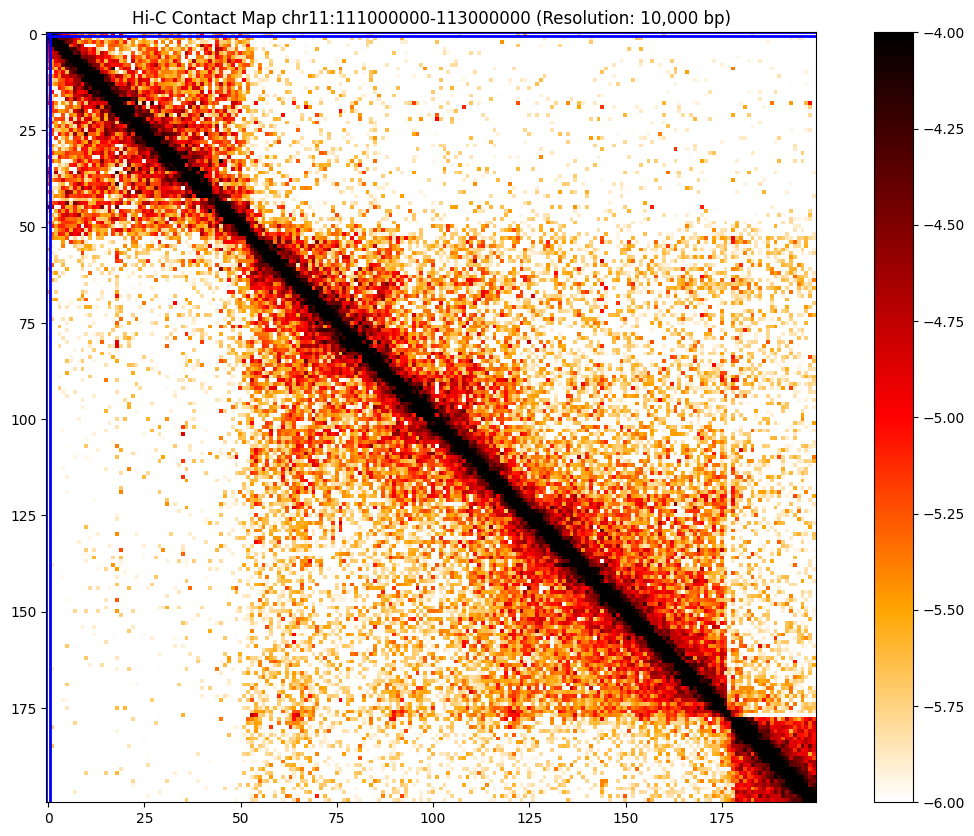

In [9]:
#sox9='chr11:112782224-112787760'
#enh13='chr11:112217279-112217835'
# read data of specific coordinates from files
c_gran=cooler.Cooler(f'granulosa.mcool::resolutions/{resolutionV}')
c_sert=cooler.Cooler(f'sertoli.mcool::resolutions/{resolutionV}')
coord = f'{chromosome.value}:{int(start.value)}-{int(end.value)}'
D_gran=c_gran.matrix().fetch(coord)
D_sert=c_sert.matrix().fetch(coord)
n=D_gran.shape[0]
#make a new matrix with the same values as granulosa but the lower triangle is filled with sertoli values
D_gran_sert=D_gran.copy()
D_gran_sert[np.tril_indices(n)]=D_sert[np.tril_indices(n)]
# Highlighting the row and column of chosen bin with a rectangular form in blue color
highlighted_row_col = int(bin.value)
horizontal_rect = patches.Rectangle((0, highlighted_row_col - 0.5), n, 1, linewidth=2, edgecolor='blue', facecolor='none')
vertical_rect = patches.Rectangle((highlighted_row_col - 0.5, 0), 1, n, linewidth=2, edgecolor='blue', facecolor='none')

# Display the contact map
plt.figure(figsize=(15,10))
plt.imshow(np.log(D_gran_sert+0.001),cmap='worb',interpolation='none',vmin=-6,vmax=-4)
plt.title(f"Hi-C Contact Map {coord} (Resolution: {resolution.value} bp)")

# Add both rectangles to the plot
plt.gca().add_patch(horizontal_rect)
plt.gca().add_patch(vertical_rect)
plt.colorbar()
plt.show()

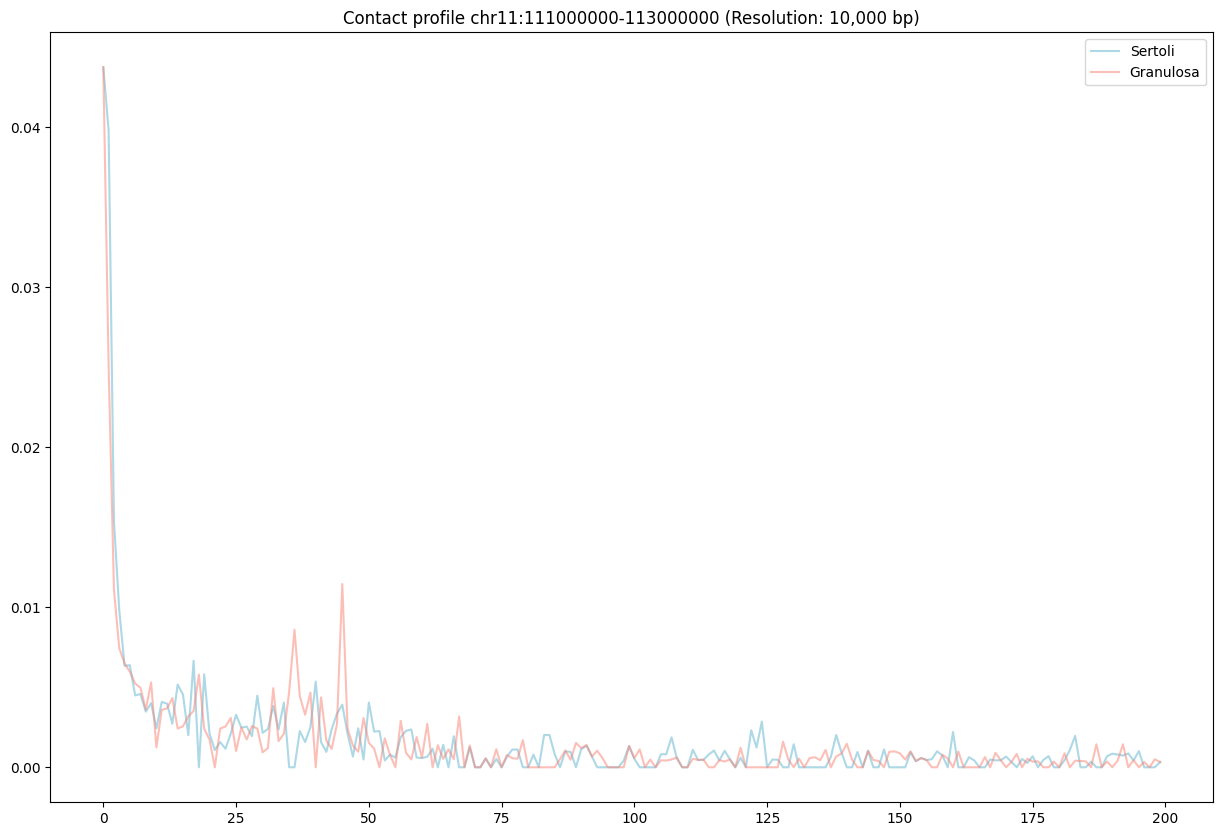

In [10]:
plt.figure(figsize=(15,10))
binV = int(bin.value)
plt.plot(D_gran_sert[binV,:], label = "Sertoli", color = "lightblue")
plt.plot(D_gran_sert[:,binV], label = "Granulosa", color = "salmon", alpha = 0.5)
if line_flag.value:
    plt.axvline(int(abline.value), color='lightgray', linestyle='--')
plt.legend()
plt.title(f"Contact profile {coord} (Resolution: {resolution.value} bp)")
plt.show()
